<h1 class="text-center">EEG data analysis with MNE (+ Python and Pandas introduction)</h1>
<h2 class="text-center">January, 2022</h2>

<br>

The purpose of this tutorial is to go over the data analysis steps you previously performed using the EEGLab program, but this time using the MNE python library. Also, this tutorial will serve as an introduction to basic Python concepts and the library Pandas, that will be used in future tutorials.
</b></div>

- In Section I, we will go over basic python structures such as lists, dictionaries, functions and classes
- In Section II, we will introduce MNE and explain the main objects used to analyze EEG data (Raw, Epochs, etc.)
- In Section III, we will describe the process to analyze the **Rest vs Count down** experiment data
- In Section IV, the **Oddball task** data will be analyzed. You Python code of pre-processing pipeline will be evaluated, along a short explanation (1 page maximum) of your choices for the different steps.

The code must be completed after each **Question** to work, where "HERE" appears as a comment in the code. The parameters that do not change the course of the story are accompanied "EDIT ME!" as a comment: you can change them at the time or at the end of the section to see the changes involved.

# I - Python basics to get started
First of all, we will go over the basics needed for python and jupyter notebooks so you can follow and complete the course going ahead. In order to execute the code you will see in the notebooks, click on a cell (like the one below) and press `Ctrl + Enter` to execute it. For those not on Windows, keep in mind the following:

- `Ctrl`: Command key `⌘`
- `Shift`: Shift `⇧`
- `Alt`: Option key `⌥`

In [1]:
print("Cell executed correctly")

Cell executed correctly


You can also use `Shift + Enter` to execute the cell and move to the next one (if there is no cell below, it will insert a new one), and `Alt + Enter` to execute the current cell and insert a new one just below (even if there are cells after the one you run).

In [2]:
print("Run me with Shift + Enter to go to the cell below")

Run me with Shift + Enter to go to the cell below


In [3]:
print("Run me with Alt + Enter to insert a new cell below, and print something there!")

Run me with Alt + Enter to insert a new cell below, and print something there!


A code cell will execute all the code inside it, and all the variables will be stored for the rest of the notebook. Be careful! Variables will stay in memory even if you delete the cell.

Let us see an example of code using multiple cells:

In [4]:
# Let's find out the number of seconds in a day
n_hours = 24
n_min = 60  # Minutes per hour

min_day = n_hours * n_min

In [5]:
n_seconds = 60  # Seconds in a minute
sec_day = min_day * n_seconds

print(f'The number of seconds in a day is {sec_day}')

The number of seconds in a day is 86400


We can assign values to variables using the `=` operator. A variable is just a name we give to a particular value, you can imagine it as a box you put a certain value into, and on which you write a name with a black marker. The following code block contains two operations. First, we assign the value 2 to the name `x`. After that `x` will hold the value 2. You might say Python stored the value 2 in `x`. Finally we print the value using the `print()` command. 

In [6]:
x = 2 
print(x)

2


Now we stores the value '2' in `x`, and hence we can use it for operations like these:

In [7]:
print(x * x)
print(x == x)
print(x > 6)

4
True
False


Let's explain these a bit:
- In the first case, we are taking our value and multiplying it by itself
- In the second case, we are using the double equal `==` operator. Contrary to `=`, that assigns the value on the right to the variable on the left, the `==` symbol checks whether the two values are equal or not, and always returns `True` or `False`. Theew is also the operator `!=`, which returns True when the compared elements are not equal
- Finally, the third case used the `>` operator, which returns true when the value on the left is higher than the value on the right. Other related operators are `<`, `>=`, and `<=`

Of course, variables are not limited to integers, we can do strings (text) like the following:

In [8]:
book = "Radiant Words"
print(book)

Radiant Words


Although we can give our variables any name we want, it is better to use descriptive names that are easy to understand by other people (Note: your future self looking at the code six months from now also counts as other people). Although extreme, not leveraging the power of clean variable names could have some devastating effects on the readability of your code.

In [9]:
# Please don't be this guy
a = 2
aa = 5
aaa = 10
aaaa = 1

print(aa > aaaa)
print(a <= aaa)

True
True


You can also update variables:

In [10]:
n_books = 1000
n_books = n_books + 1
print(n_books)

1001


This is equivalent to:

In [11]:
n_books = 1000
n_books += 1
print(n_books)

1001


## Lists and Dictionaries

We will now go over two of the most important data structures in Python: lists and dictionaries. These are used to store different variables using the structure that better serves our purpose:

- Lists keep the variables in the order we add them to the list, and are indexed by position
- Dictionaries do not keep an order, as they are indexed by a "key", similar to how real dictionaries are ordered by words that contain definitions

We will start with lists. A list is created with square brackets `[ ]` and can contain any type of variable:

In [12]:
my_list = [1, 2, "three", 5.7, True]
print(my_list)

[1, 2, 'three', 5.7, True]


To recover elements of the list, we use the index or position. For example, if we want to print the first element of the list:

In [13]:
print(my_list[0])

1


In Python, the first index of any element is always 0. You need to keep in mind the length of the list, as you will get an error if you try to index beyond the length of the list.

In [14]:
print(my_list[20])

IndexError: list index out of range

Usually, lists are iterated over using a for loop, and the iterator used is a range of numbers generated over the length of the list, like this:

In [ ]:
for idx in range(len(my_list)):
    print(my_list[idx])

The `len()` function returns the number of elements on a list, while the `range()` function takes a number and generates a list of numbers from 0 to the number - 1. This is a good time to tell you that you can check how any function works by running a code cell with the function name followed by `?`:

In [ ]:
range?

In [ ]:
len?

Whenever you encounter a function and you are unsure of how it works, check the documentation! This will be very valuable going forward. According to the documentation on `range()`, we can choose the starting and stopping point of the sequence, and even the step!

In [ ]:
for i in range(10, 15):  # (start, stop)
    print(i)

In [ ]:
for i in range(10, 31, 2):  # (start, stop, step)
    print(i)

You can also index using negative numbers to start from the end 

In [ ]:
print(my_list[-2])

Could you iterate the list in reverse? Try it out! Also, we can index several elements at once by using a range of indexes separared by `:`

In [ ]:
print(my_list)
print(my_list[0:2])

As with the `range` function, index ranges include the beginning but not the end. Lastly, you can index fron the nth element until the end or from the beginning until the last element like:

In [ ]:
print(my_list[:4])  # Up to the 4th element, identical to my_list[0:4]
print(my_list[3:])  # From the 3rd element onwards, identical to my_list[3:-1]

Now we will finish by explaining dictionaries and their uses. Dictionaries are created using the curly brackets `{}` and always follow a `{key: value}` structure:

In [ ]:
my_dict = {'books': ['The Way of Kings', 'The Final Empire', 'Warbreaker'],
           'ratings': [10, 9, 8.5]}

The keys and values can be any type of variable we want, in this case we are using strings for the keys as it is more intuitive, but we could, for example, have a dictionary where the labels of our data observations are the keys, and the values correspond to the text labels. Imagine the classic 'dogs vs. cats' neural network, we could have our labels as:

In [ ]:
label_id = {0: 'dog', 
            1: 'cat'}

That way, we can work with numerical labels and have an easy way of looking up their real meaning at any time. But how do we access dictionaries? Contrary to lists, that are accessed by position, dictionaries are accessed by key:

In [ ]:
print(label_id[0])
print(my_dict['books'])

If we try to access a key that does not exist, we will get an error:

In [ ]:
my_dict['n_pages']

However, we can assign a value to a key that does not exist in order to create it

In [ ]:
my_dict['n_pages'] = [1007, 541, 592]
print(my_dict['n_pages'])

As for iterating, if you use a dictionary by itself, the iterator will be the keys of the dictionary. You can also iterate the values directly by using `dict.values()` and get both keys and values as tuples with `dict.items()`

In [ ]:
# Iterate keys
for key in my_dict:
    print(f'{key} is something we are keeping track of in this dict')
    print(f'  The values for the entry {key} are {my_dict[key]}')
    print()

# Iterate values
for val in my_dict.values():
    print(f"Something in our dict has the value {val}, but we don't really know what")
    
print()

# Iterate both keys and values
for key, val in my_dict.items():
    print(f'We know we have the key {key}, and its value is {val}. This looks similar to what we did before...')
    print()

Most of the time, iteraring by keys is what makes the most sense, as you can access the values by using `my_dict[key]` if you need so. Iterating by key and value pairs has uses as well, but iterating over values only is much more uncommon and defeats the purpose of using dictionaries in the first place

Most of the EEG data we will process during this course will be stored on high-level objects, but the big majority of the information is stored in list or dictionaries, so with that knowledge you will surely be able to manipulate all the necessary information for completing this and the following practical sessions.

# II - The basics of MNE

With the basics of Python covered, we will now move on to a short summary of the actions that we will use the most for the remainder of the course, and then move on to the actual analyses of the data you already performed using EEGLab. We will cover:

- How to load data
- The raw object and relevant methods / attributes
- Basic pre-processing steps
- Event extraction and manipulation
- Epoching data and how to work with the Epochs object

Our basic summary is inspired from the MNE documentation. You can find tutorials and examples for a wide range of different analysis and signal processing techniques [here](https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py). We will start by importing the libraries we are going to need.

In [15]:
import os

import mne
import numpy as np

## Loading Data
First of all, we will learn how to load our data. MNE supports many common file extensions for EEG and MEG data (you can read more about the details in the [MNE I/O documentation](https://mne.tools/0.16/manual/io.html). Since you have been working with EEGLab data, we will load the an example .set file using the `read_raw_eeglab()` function. 

In [16]:
notebook_path = os.getcwd()
data_path = os.path.join(notebook_path, 'data/mne_tuto/example_data.set')

raw = mne.io.read_raw_eeglab(data_path, preload=True)

Reading /home/dcas/l.darmet/isae_ICM_cours/data/mne_tuto/example_data.fdt
Reading 0 ... 143272  =      0.000 ...   286.544 secs...


/tmp/ipykernel_71226/3402409392.py:4: RuntimeWarning: Data file name in EEG.data (P1_low_100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (example_data.fdt).
  raw = mne.io.read_raw_eeglab(data_path, preload=True)


And like that, we get our data in a `raw` object, one of MNE's core data structures. If you are curious about that `preload=True` argument, remind yourself of checking the function's signature!

In [17]:
mne.io.read_raw_eeglab?

Signature:
mne.io.read_raw_eeglab(
    input_fname,
    eog=(),
    preload=False,
    uint16_codec=None,
    verbose=None,
)
Docstring:
Read an EEGLAB .set file.

Parameters
----------
input_fname : str
    Path to the .set file. If the data is stored in a separate .fdt file,
    it is expected to be in the same folder as the .set file.
eog : list | tuple | 'auto'
    Names or indices of channels that should be designated EOG channels.
    If 'auto', the channel names containing ``EOG`` or ``EYE`` are used.
    Defaults to empty tuple.

preload : bool or str (default False)
    Preload data into memory for data manipulation and faster indexing.
    If True, the data will be preloaded into memory (fast, requires
    large amount of memory). If preload is a string, preload is the
    file name of a memory-mapped file which is used to store the data
    on the hard drive (slower, requires less memory).
    Note that preload=False will be effective only if the data is stored
    in a sepa

## The Raw object

We can get a summary of our `Raw` object by printing it! Also, we will take this chance to have a look at the raw's `info`. This a dictionary-like object that is preserved across data structures (e.g. when going from `Raw` to `Epochs`). This object contains all the relevant metadata of our file, with things like the channel names and the sampling frequency. Check [this page](https://mne.tools/stable/auto_tutorials/intro/30_info.html#tut-info-class) for a complete overview of the `info` data structure.

In [18]:
print(raw)
print()
print(raw.info)

<RawEEGLAB | example_data.fdt, 32 x 143273 (286.5 s), ~35.0 MB, data loaded>

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
>


The `Raw` object has many built-in methods that are useful, we will show some of them next. You can check all those handy functions on the [Raw object's documentation page](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw). This object sports numerous interesting functions that will allow you to inspect the data and perform any basic operation you will need during your EEG analyses. For example, you can plot the power spectral density (PSD) of your signal, or simply plot your data to have a look at the raw EEG signals.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


/usr/local/lib/python3.8/dist-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


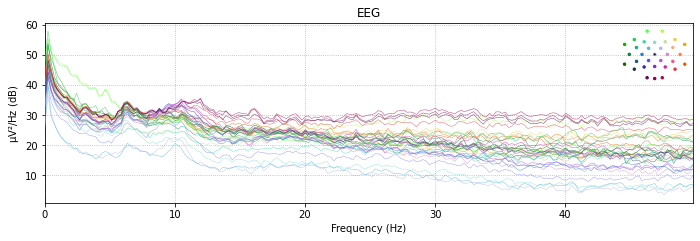

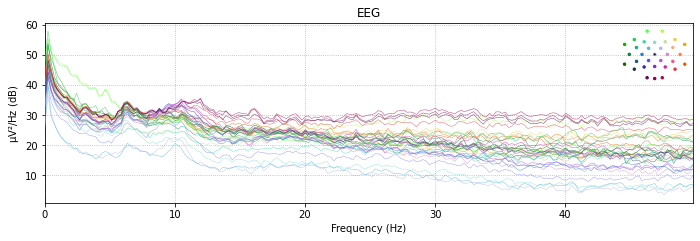

In [19]:
raw.plot_psd(fmax=50)

## Preprocessing

Now we will move on to the first part of the analysis: the cleaning of the signal, otherwise known as preprocessing. Preprocessing steps are not set in stone, and different analyses will have different preprocessing pipelines, but we will go over some of the most basic steps, that are presents in most EEG data analyses. Those are:

- Experimental event extraction
- Re-referencing
- Filtering (notch and band-pass)
- Epochs

### Finding experimental events
Usually, data is collected with stamps that indicate when in time different events were presented. There are two usual ways these events are included in the data:

- There is a STIM channel along with the data channels
- There is a separate annotation file with the event information

The later case is what we will go over now. If you are curious about event extraction using a STIM channel, check the documentation on the [find events function](https://mne.tools/stable/generated/mne.find_events.html#mne.find_events)

In [20]:
# Extract the events and the event_id dict
events, event_id = mne.events_from_annotations(raw, verbose=False)

print(event_id)
print(events)

{'12.000000': 1, '14.000000': 2, '16.000000': 3, '18.000000': 4}
[[  9981      0      1]
 [ 11830      0      4]
 [ 13680      0      3]
 [ 15530      0      2]
 [ 17949      0      2]
 [ 19799      0      4]
 [ 21649      0      1]
 [ 23499      0      3]
 [ 25813      0      4]
 [ 27662      0      2]
 [ 29512      0      3]
 [ 31362      0      1]
 [ 35409      0      1]
 [ 37259      0      2]
 [ 39109      0      4]
 [ 40959      0      3]
 [ 43397      0      1]
 [ 45247      0      3]
 [ 47097      0      2]
 [ 48947      0      4]
 [ 53933      0      3]
 [ 55783      0      1]
 [ 57633      0      2]
 [ 59483      0      4]
 [ 62429      0      3]
 [ 64278      0      2]
 [ 66128      0      1]
 [ 67978      0      4]
 [ 70701      0      1]
 [ 72550      0      3]
 [ 74400      0      4]
 [ 76250      0      2]
 [ 80133      0      3]
 [ 81983      0      1]
 [ 83833      0      2]
 [ 85683      0      4]
 [ 88997      0      3]
 [ 90847      0      4]
 [ 92697      0      2]

Here we can see that we obtain two structures: `events` and `event_id`. The first one contains the events themselves, with a 3-element list per event. The first element indicates the timestamp of the corresponding event, and the last one indicates the label (the middle one is usually ignored). The `event_id` is a dictionary that related the different labels with their corresponding text label, so we can easily keep track of thich label corresponds to which type of event.
 
Now, you may have noticed that labels start with 1. When we use different prediction models, usually we treat our labels to start from 0, so we can quickly create a `labels` object and include this small correction.

In [21]:
# Copy the events so further modifications do not affect out labels
labels = events.copy()[:, -1]

# Suctract 1 to each element of the array in order to start from 0
labels -= 1

### Re-referencing and filtering
Our labels are ready for later use. Now we will start playing with the data itself. We can set an average reference with the `set_eeg_reference` function:

In [22]:
raw.set_eeg_reference('average', verbose=False)  # You can also add a channel / group of channels for re-referencing

<RawEEGLAB | example_data.fdt, 32 x 143273 (286.5 s), ~35.0 MB, data loaded>

The same applies to filtering. We filter the data in order to exclude certain frequencies for the whole signal, for various reasons:

- Band-pass filtering keeps only the signals with frequencies between the two numbers we indicate. This is used to narrow down the frequencies we are interested in for the analysis
- Notch filtering, on the contraty, excludes a very narrow frequency from the signal. This type of filtering is often used to remove power-line artifacts that are caused by the electrical current of the equipment

In [23]:
# We can filter, for example, between 1 and 60Hz. Removing frequencies below 1Hz gets rid of low-frequency drifting present on the signal
raw = raw.filter(h_freq=60, l_freq=1, verbose=False)

# As for the notch filtering, the main power-line artifact appears at 50Hz (60Hz in USA and other countries). We do not need to filter at the harmonics (i.e., 100Hz, 150Hz, etc.), because they are
# excluded by our previous band-pass filter
raw = raw.notch_filter(50, verbose=False)

### Epoching

Finally, we will divide our continuous data into windows centered around the experimental events. These windows are called epochs and they allow us to compare the signal on different instances of the same experimental events, (hopefully) to draw conclusions about the typical brain response to said events. We can epoch out data by transforming our `Raw` object into an `Epochs` object

In [24]:
epochs = mne.Epochs(raw, events, event_id=event_id,
                    tmin=0, tmax=2, baseline=(0.2, 2),
                    preload=True, verbose=False)

Let's go over some parameters of the `mne.Epochs` function. Epoch parameters can vary widely across different analyses, and you can check [the documentation](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) for a detailed explanation of all possible parameters.

- `event_id` is passed to the `Epochs` object so we can have direct access to the events from the object
- `t_min` and `t_max` indicate the time that comprises the epoch, with respect to each event. A `t_min` of 0 indicates the timestamp of the event, and a negative `t_min` indicates time (in seconds) before each event
- The `baseline` parameter takes a tuple of times that must be included into the length of the epoch and is used to even out all the epochs so they can be compared

# III - Spectral analysis: eyes open - eyes closed

Now we are equipped for our first real data analysis using MNE. On this and the next section, we will replicate the two analyses you performed on the data you previously collected using the Muse system and then analyzed using EEGLAB. Some functionalities are different between the two tools, but you will be able to perform the same analyses using both EEGLAB and MNE. For this first analysis, we will:

- Filter the data
- Set the re-referending
- Extract experimental events
- Epoch the data
- Perform spectral analysis

As you already know how to perform the two steps, we will go over the procedure for the spectral analysis. You have data of two different conditions, so we will use the first one as a walk-through the different steps of the analysis, and you will code the same analysis for the second condition and the comparison between the two as an exercise at the end.

In [25]:
# Preprocessing
notebook_path = os.getcwd()
path_to_data = os.path.join(notebook_path, 'data/mne_tuto/eyesopen.set')
raw = mne.io.read_raw_eeglab(path_to_data, preload=True)

# Re-reference to the mastoid electrodes (T9 and T10)
raw.set_eeg_reference(ref_channels='average')

# Filter
raw = raw.filter(h_freq=30, l_freq=1)

# Epoch the data - Edit the parameters for eyes open / eyes closed data
epochs = mne.make_fixed_length_epochs(raw, duration=1.)

Reading /home/dcas/l.darmet/isae_ICM_cours/data/mne_tuto/eyesopen.fdt
Reading 0 ... 15359  =      0.000 ...    59.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)

Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Now we will the 'eyes open' condition and transform the signal of the epoch into the spectral domain. Then, we will plot the result separately for each electrode, and we will be able to observe which frequencies are more present on this data condition.

First, we import the welch analysis from the scipy library (NOTE: You should never import libraries in the middle of your notebook or script, the correct practice is to import everything at the beginning of your script or on the top cell of the notebook, we do it like this during some notebooks in order to make keeping track of the different elements used easier)

In [26]:
from scipy.signal import welch
import matplotlib.pyplot as plt

Using data from preloaded Raw for 60 events and 256 original time points ...


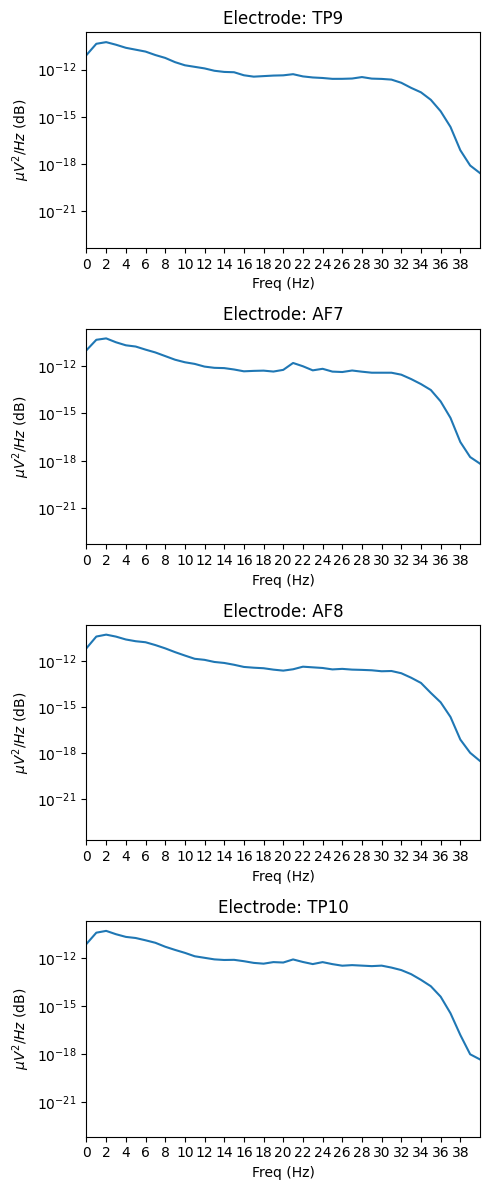

In [43]:
# Spectral analysis
data = epochs.get_data()  # Get the data array from the epochs
sfreq = epochs.info['sfreq']

f, psd = welch(data, sfreq, nperseg=sfreq)
psd_trial = np.mean(psd, axis=0)
N = len(data)
n = np.arange(N)
T = N/sfreq
freq = n/T 

ch_names = epochs.info['ch_names']
fig, axes = plt.subplots(len(ch_names), figsize=(5, 3 * len(ch_names)))

for i, ch_name in enumerate(ch_names):
    axes[i].plot(f, psd_trial[i])#linefmt='b', markerfmt=" ", basefmt="-b")
    axes[i].set_yscale('log')
    #axes[i].set_xscale('log')
    axes[i].set_xlabel('Freq (Hz)')
    axes[i].set_ylabel('$\mu V^2/Hz$ (dB)')
    axes[i].title.set_text(f'Electrode: {ch_names[i]}')
    
    axes[i].set_xticks(range(0, 40, 2))
    axes[i].set_xlim(0, 40)
    
fig.tight_layout()
plt.show()

## Frequency band analysis

Lastly, we will explore how to divide the spectral information into different frequency bands. Bran activity is categorized as a function of how fast it oscilates, and different brain rhythms indicate different mental states (e.g. prominent alpha rhythm indicates relaxation). The main rhythms are:

- Delta (1-4Hz)
- Theta (4-8Hz)
- Alpha (8-12Hz)
- Beta (13-30Hz)

The frequencies are approximated and different sources can explain them with small variations. In order to analyze our data in different frequencies, we just have to filter the data on the corresponding frequency band, and put them all together to get a nice plot.

In [48]:
# Prepare your frequency bands
iter_freqs = [
    ('Delta', 1, 3),
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 30),
]

frequency_map = {}

for band, fmin, fmax in iter_freqs:
    spectrum = epochs.compute_psd(method='welch',fmin=fmin, fmax=fmax)
    psds, freqs = spectrum.get_data(return_freqs=True)
    psds = np.abs(10*np.log10(psds))
    psds = np.mean(psds, axis=-1)  # Average over freqs
    psds = np.mean(psds, axis=0)  # Average over trials
    
    frequency_map[band] = psds

Using data from preloaded Raw for 60 events and 256 original time points ...
Effective window size : 1.000 (s)
Using data from preloaded Raw for 60 events and 256 original time points ...
Effective window size : 1.000 (s)
Using data from preloaded Raw for 60 events and 256 original time points ...
Effective window size : 1.000 (s)
Using data from preloaded Raw for 60 events and 256 original time points ...
Effective window size : 1.000 (s)


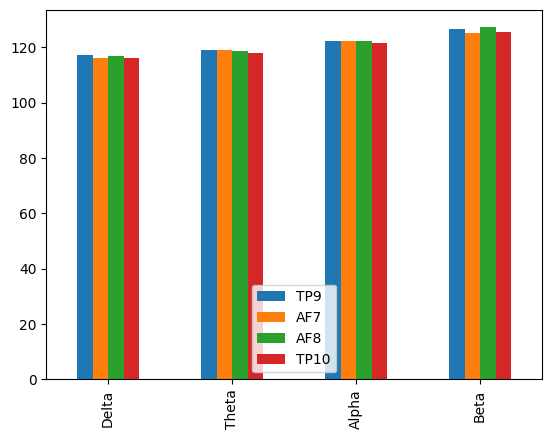

In [49]:
import pandas as pd
df = pd.DataFrame(frequency_map).T
df.columns = epochs.ch_names
df.plot.bar()
plt.show()

Excellent! Now you can do the same with the 'eyes open' condition to practice what we have done so far.

#### ❓ **Question** ❓ 
Code the full preprocessing pipeline and spectral analysis. The different steps will be performed on different cells, indicated by a comment block such as `# Filter your data below`. After some steps, you will be asked to fill a text block giving a brief explanation of what you just did. Try to understand what each processing step does to the data and why it is important for us to perform it in order to arrive at meaningful conclusions.

If you don't know, do not hesitate to ask the teachers!

In [30]:
# Load your eyes closed data
path_to_data = 
raw_closed = 

SyntaxError: invalid syntax (4014851999.py, line 2)

In [ ]:
# Set the re-reference to mastoid electrodes

What does re-referencing do?

Answer:

In [ ]:
# Filter the data between 1 and 30Hz

What do we achieve by filtering? Are we using a notch filter this time? Why?

Answer:

In [ ]:
# Extract the events

What information is contained in the `events` object?

Answer:

In [ ]:
# Epoch the data

What are epochs? What is the time 0 of each epoch?

Answer:

In [ ]:
# Perform the spectral analysis and plot the results (you can copy-paste, it's ok)

Even if you have little experience with spectral analysis, try to think about the information we obtain from the spectral domain. What does it mean to have a peak on the spectral information of one of the conditions?

What differences do you observe between the two conditions? What conclusions can you extract from it?

Answer:

## IV - 'Oddball Task' data analysis

Now we will conclude this MNE introduction tutorial by analyzing the data you previously acquired for the 'Oddball Task'. We will take this chance to explore evoked potentials and learn to average EEG responses in order to extract a general pattern of activation in response to an experimental event.

You will be evaluated on two aspects: 
1. A standalone Python script to load and pre-process data, along the data you used.
2. A small report (1 page max) explaining your choices and the different steps.

We expect your code (a standalone Python script or notebook) and the 1 page report in a *.zip* file by email to <Juan-jesus.TORRE-TRESOLS@isae-supaero.fr> before the 15th of February. Your Python script will be mostly copy-paste of the follwing blocks of code in this notebook.

We start with the usual preprocessing

In [ ]:
data_path = '/path/to/your/data'
raw_data = mne.io.read_raw_eeglab(data_path, preload=True, verbose=False)

# Average re-referencing
mne.set_eeg_reference(raw_data, 'average', copy=False, verbose=False)

# High pass filtering to remove drifts
raw_data.filter(l_freq=0.1, h_freq=None)

# Epoch data using markers (from -0.3s to +0.7s)
events, event_id = mne.events_from_annotations(raw_data, event_id='auto', verbose=False)
epochs = mne.Epochs(raw_data, events, event_id=event_id, 
                    tmin=-0.3, tmax=0.7, preload=True)

We will add an extra step we did not see before. We will reject some of the epochs based on a maximum microvolt value. This is usually done for ERPs, so the final shape is nicer.

In [ ]:
# Reject some epochs that have to large magnitude to have nicer ERP plots
reject_criteria = dict(eeg=100e-6)  # 100 µV
epochs.drop_bad(reject=reject_criteria)

Now we have to separate the epochs by conditions. If you notice, we passed the `event_id` object when creating the epochs. We can index the epochs using the condition names from `event_id` to separate all the epochs from that condition. For example, if we have a condition named `target`, we can take the average of all the target epochs with `epochs['target'].average()`. Do the same below by using your conditions' names:

In [ ]:
# Average using conditions --> now it is not "Epochs" object anymore but "Evoked"
l_frequent = 
l_target = 

You can plot the ERP using the `plot()` function

In [ ]:
# Plot ERP
fig1 = l_frequent.plot()

In [ ]:
fig2 = l_target.plot(spatial_colors=True)

You can also plot a topological map, and both the ERP and the topomap together

In [ ]:
# Plot averaged topomap on distinct timestamps
l_target.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)

In [ ]:
# Plot Topo + ERP 
l_frequent.plot_joint()

Finally, we can compare the ERPs directly on a single plot

In [ ]:
# Comparing conditions on a subset of electrodes
evokeds = dict(frequent=l_frequent, target=l_target)
mne.viz.plot_compare_evokeds(evokeds, picks='Fp1')

In [ ]:
mne.viz.plot_compare_evokeds(evokeds, picks='Fp2')

In [ ]:
mne.viz.plot_compare_evokeds(evokeds, picks=['Fp1', 'Fp2'], combine='mean')